In [2]:
from qiskit import*

In [3]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

In [4]:
qc.x(0)
qc.z(0)
qc.barrier()

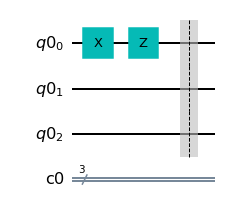

In [5]:
%matplotlib inline
qc.draw(output='mpl')

In [6]:
qc.h(1)
qc.cx(1,2)
qc.barrier()

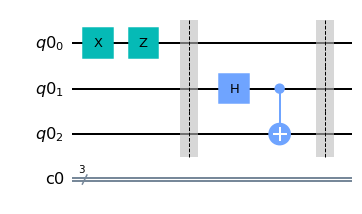

In [7]:
qc.draw(output='mpl')

In [8]:
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()

In [9]:
qc.z(2)
qc.x(2)
qc.measure(2,2)

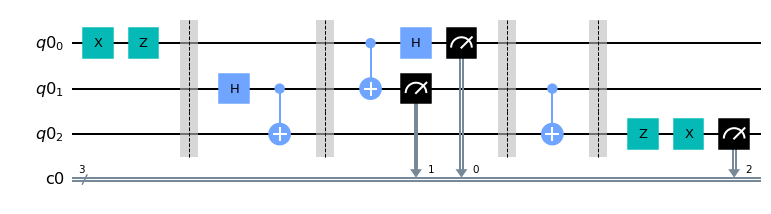

In [10]:
qc.draw(output='mpl')

In [15]:
simulator = Aer.get_backend('qasm_simulator')

In [17]:
result = execute(qc, backend = simulator).result()

In [18]:
from qiskit.tools.visualization import plot_histogram

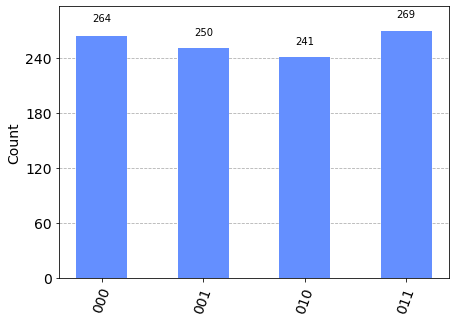

In [19]:
plot_histogram(result.get_counts(qc))

In [20]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [23]:
qcomp = provider.get_backend('ibm_oslo')

In [24]:
job = execute(qc, qcomp, shots=1024)

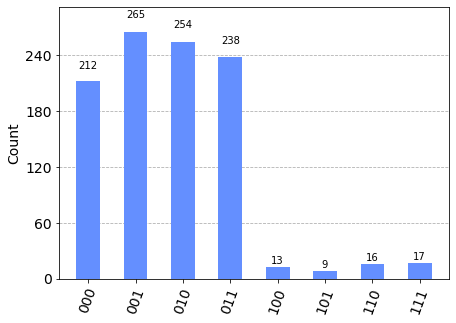

In [25]:
job_result = job.result()
result = job_result.get_counts(qc)
plot_histogram(result)